<a href="https://colab.research.google.com/github/hemant5668/deep-learning/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#load the dataset and unzip becoz of colab platform
from zipfile import ZipFile
file_name='/content/drive/My Drive/dataset/digit-recognizer.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')


done


In [0]:
#load training dataset into a variable
train_data=pd.read_csv('/content/train.csv')
test_data='/content/train.csv'

In [5]:
train_data.head()     #view the top 5 row of dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x=train_data.drop('label',axis=1).values
y=train_data['label'].values

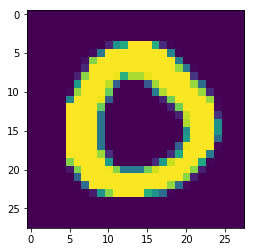

In [7]:
d=x[4]
d.shape=(28,28)
plt.imshow(d)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
predictions=knn.predict(x_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1239    0    0    0    0    1    4    0    0    0]
 [   0 1380    1    2    1    1    0    1    0    0]
 [  13   12 1204    4    0    1    1   17    2    0]
 [   2    6    6 1266    0   16    2   10    8    5]
 [   0   17    0    0 1174    0    4    0    0   26]
 [   6    2    1   22    0 1115    5    0    2    6]
 [  10    2    1    0    3    6 1257    0    0    0]
 [   0   16    5    0    5    0    0 1322    0    9]
 [   6   12    6   23    7   21    6    1 1046   17]
 [   4    3    3   10   12    3    1   19    1 1178]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1244
           1       0.95      1.00      0.97      1386
           2       0.98      0.96      0.97      1254
           3       0.95      0.96      0.96      1321
           4       0.98      0.96      0.97      1221
           5       0.96      0.96      0.96      1159
           6       0.98      0.98      0.98      1279
           7       0.96      0.97 

In [0]:
test_data=pd.read_csv('/content/test.csv').values


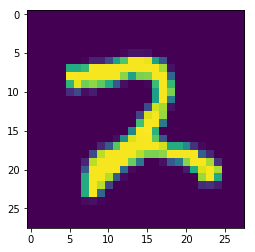

[2]


In [11]:
d=test_data[27000]
d.shape=(28,28)
plt.imshow(d)
plt.show()
predict=knn.predict([test_data[27000]])
print(predict)

In [0]:
predictions_test=knn.predict(test_data)

In [0]:
result=pd.DataFrame(predictions_test)

In [0]:
result.to_csv('result_test.csv', index =True,header=['Label'],index_label='ImageId')

In [0]:
dframe = pd.read_csv(open('/content/result_test.csv')) #for setting up the index start from one
dframe.index = dframe.index + 1

In [0]:
dframe.to_csv('ans.csv',index_label='ImageId')